## **Transfer Learning Feature-extraction `(with-data-augmentation)`**

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [3]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [4]:
conv_base.trainable = False

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../../DATASETS/animals/Train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '../../DATASETS/animals/Test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(
        train_generator,
        epochs=5,
        validation_data=validation_generator)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9150 - loss: 0.2350 - val_accuracy: 0.9800 - val_loss: 0.0509
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9875 - loss: 0.0379 - val_accuracy: 0.9850 - val_loss: 0.0273
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9950 - loss: 0.0161 - val_accuracy: 0.9750 - val_loss: 0.0482
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9912 - loss: 0.0322 - val_accuracy: 0.9850 - val_loss: 0.0308
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9912 - loss: 0.0208 - val_accuracy: 0.9900 - val_loss: 0.0319


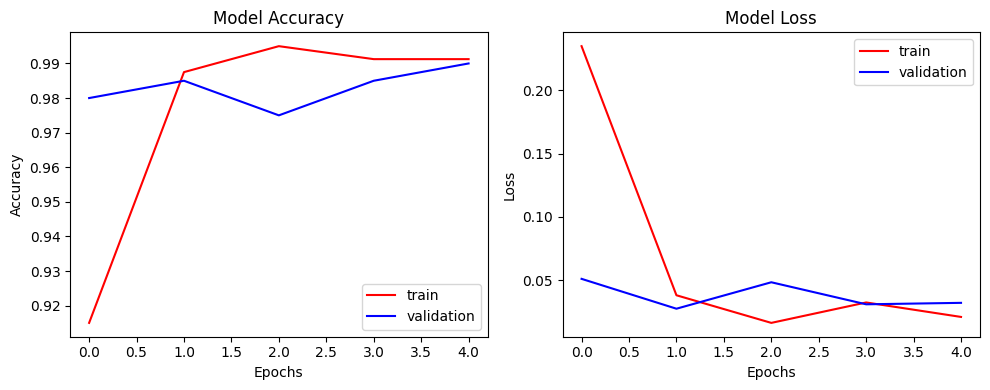

In [14]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (rows=1, cols=2)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot Accuracy
ax[0].plot(history.history['accuracy'], color='red', label='train')
ax[0].plot(history.history['val_accuracy'], color='blue', label='validation')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot Loss
ax[1].plot(history.history['loss'], color='red', label='train')
ax[1].plot(history.history['val_loss'], color='blue', label='validation')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()
